In [278]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import matplotlib.pyplot as plt
import pims
import trackpy as tp

In [279]:
frames=pims.ImageSequence("C:/Users/Joanny/OneDrive - umontpellier.fr/Scolaire/Licence 3 PF/projet tutoré/projet tutoré 20fev/exp1_20fev/img_gris/*.tiff")

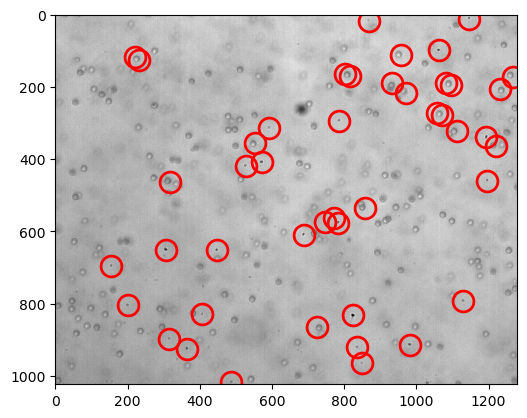

<Axes: >

In [280]:
f = tp.locate(frames[0], 9, invert=True, minmass=300)

plt.figure()  # make a new figure

tp.annotate(f, frames[0])

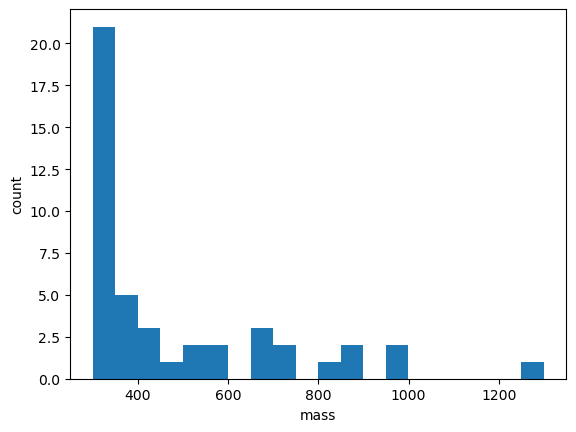

In [281]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

In [282]:
f=tp.batch(frames[:], 9, invert=True, minmass=300)

Frame 442: 28 features


C:\Users\Joanny\anaconda3\Lib\site-packages\trackpy\plots.py:638: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  axlist = f[pos_columns].applymap(lambda x: x % 1).hist()


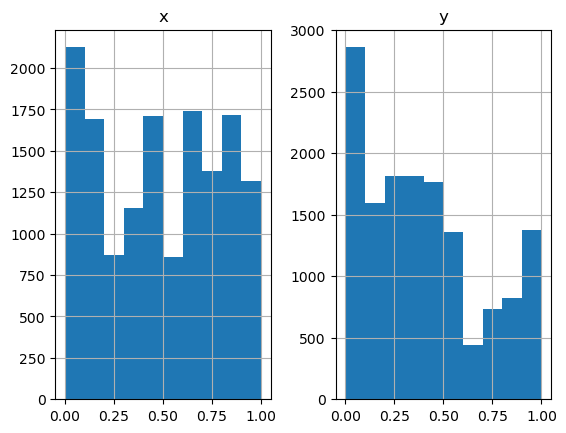

In [283]:
tp.subpx_bias(f); #permet de voir la répartition de position des particules 

In [284]:
t = tp.link_df(f, 5, memory=3) #permet de detecter les trajectoires

Frame 442: 28 trajectories present.


In [285]:
t1 = tp.filter_stubs(t, 50)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())


Before: 575
After: 41


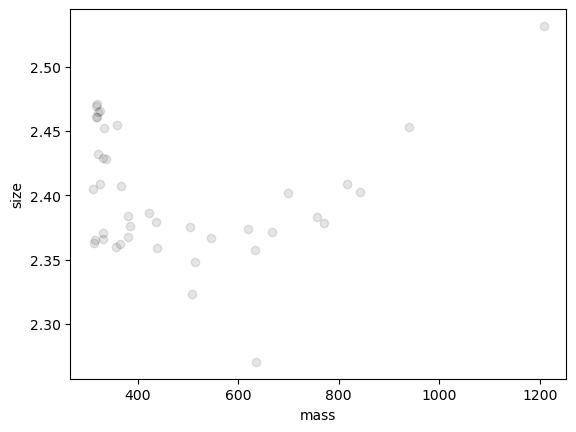

In [286]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean()); # convenience function -- just plots size vs. mass

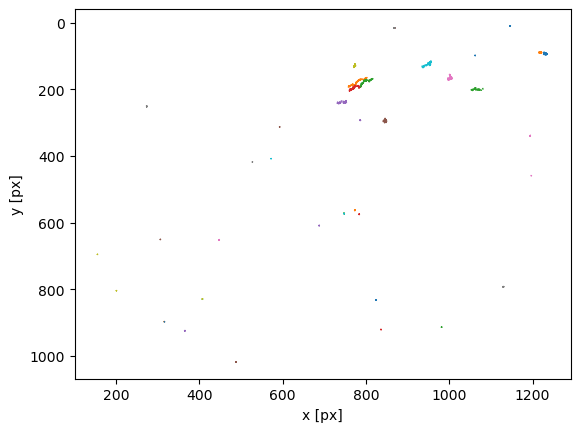

In [287]:
plt.figure()
tp.plot_traj(t1);

on voit qu'il y a du drift, on va l'enlever 

In [289]:
d = tp.compute_drift(t1, 15)

<Figure size 640x480 with 0 Axes>

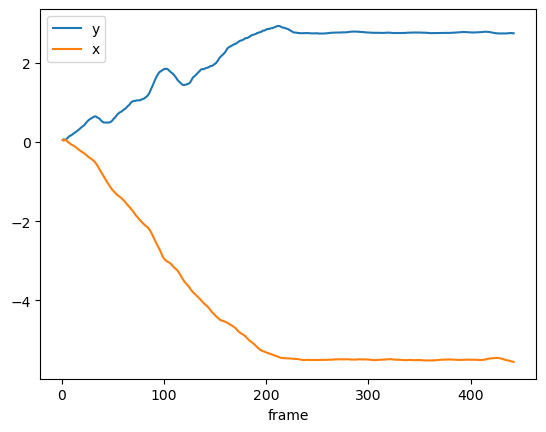

In [290]:
plt.figure()
d.plot();

In [291]:
tm = tp.subtract_drift(t1.copy(), d)
tm.to_excel("exp_40%glycérol_exp1_30°C_position.xlsx",index=True)

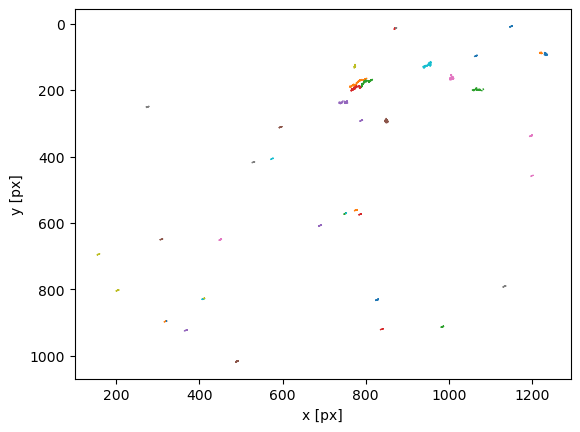

In [292]:
plt.figure()
ax = tp.plot_traj(tm)

On voit que trackpy a du mal à enlever le drift


ON PASSE MAINTENANT À L'ANALYSE

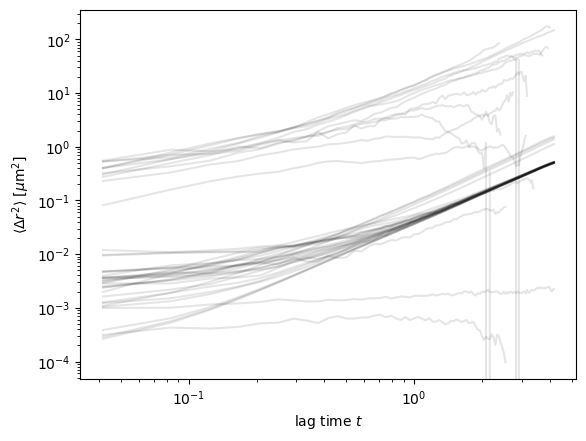

In [295]:
tm=tm.rename(columns={"particle":"Particle"})
im = tp.imsd(tm, 100/285., 24)  # microns per pixel = 100/285., frames per second = 24
fig, ax = plt.subplots()
ax.plot(im.index, im, 'k-', alpha=0.1)  # black lines, semitransparent
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set_xscale('log')
ax.set_yscale('log')
plt.savefig("depl_car_moy.png")

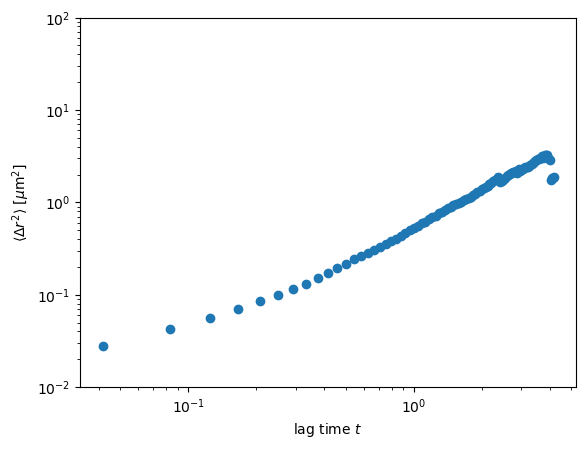

In [296]:
tm = tp.subtract_drift(t1.copy(), d)
em = tp.emsd(tm, 100/285., 24)
fig, ax = plt.subplots()
ax.plot(em.index, em, 'o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
       xlabel='lag time $t$')
ax.set(ylim=(1e-2, 1e2));
plt.savefig("depl_car_moy_ensemble.png")

In [318]:
em.to_excel(r'C:/Users/Joanny/OneDrive - umontpellier.fr/Scolaire/Licence 3 PF/projet tutoré/projet tutoré 20fev/exp1_20fev/exp_40%glycérol_exp1_30°C_dpl_moy.xlsx')

lagt
0.041667    0.027711
0.083333    0.042171
0.125000    0.055343
0.166667    0.070075
0.208333    0.084559
              ...   
4.000000    2.890643
4.041667    1.765116
4.083333    1.812147
4.125000    1.834951
4.166667    1.872444
Name: msd, Length: 100, dtype: float64


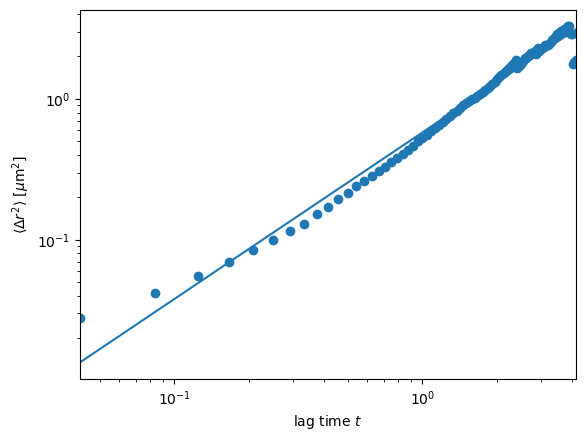

,n,A
msd,1.182026,0.577807


In [298]:
plt.figure()
plt.ylabel(r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]')
plt.xlabel('lag time $t$');
tp.utils.fit_powerlaw(em)